# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     2.986341e+01     7.122053e+00
 * time: 0.0016379356384277344
     1     2.975767e+01     5.744923e+00
 * time: 0.006715059280395508
     2     2.255256e+01     7.090129e+00
 * time: 0.012588977813720703
     3     1.971737e+01     7.984852e+00
 * time: 0.01781606674194336
     4     1.580482e+01     6.042880e+00
 * time: 0.05562090873718262
     5     1.183099e+01     3.700071e+00
 * time: 0.05903792381286621
     6     1.121316e+01     2.946226e+00
 * time: 0.0618441104888916
     7     1.005418e+01     1.678267e+00
 * time: 0.06476593017578125
     8     9.147670e+00     1.521476e+00
 * time: 0.06839895248413086
     9     8.704294e+00     1.483869e+00
 * time: 0.07253694534301758
    10     8.480229e+00     1.029419e+00
 * time: 0.07668805122375488
    11     8.340796e+00     6.927871e-01
 * time: 0.08119010925292969
    12     8.224951e+00     6.228636e-01
 * time: 0.08597302436828613
    13     8.170062e+00     9.000779e-01
 * ti

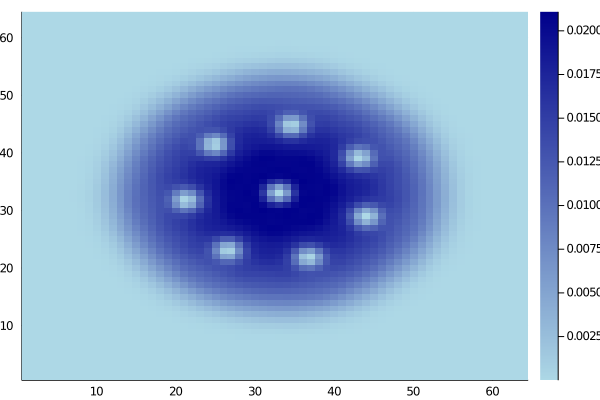

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)